In [2]:
import numpy as np
import pandas as pd
pd.set_option('max_colwidth', 400)

In [3]:
df = pd.read_csv('../../data/corpus2.csv')

### Preprocessing

encoding labels

In [5]:
from sklearn.preprocessing import LabelEncoder

In [8]:
le = LabelEncoder()
df.emotion = le.fit_transform(df.emotion)

In [10]:
le.classes_

array(['Negative', 'Positive'], dtype=object)

In [12]:
df.head()

,tweet_text,emotion
0,".@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead! I need to upgrade. Plugin stations at #SXSW.",0
1,"@jessedee Know about @fludapp ? Awesome iPad/iPhone app that you'll likely appreciate for its design. Also, they're giving free Ts at #SXSW",1
2,@swonderlin Can not wait for #iPad 2 also. They should sale them down at #SXSW.,1
3,@sxsw I hope this year's festival isn't as crashy as this year's iPhone app. #sxsw,0
4,"@sxtxstate great stuff on Fri #SXSW: Marissa Mayer (Google), Tim O'Reilly (tech books/conferences) &amp; Matt Mullenweg (Wordpress)",1


feature and target split

In [14]:
X = df.tweet_text
y = df.emotion

In [15]:
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords, wordnet
sw = stopwords.words('english')
sw[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [16]:
from nltk.tokenize import regexp_tokenize, RegexpTokenizer, word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from wordcloud import WordCloud
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

In [48]:
sw.extend(['sxsw', 'mention', 'link', 'ipad', 'google', 'apple', 'iphone', 'austin', 'quot', 'store', 'android', 'new', 'sxswi'])

In [18]:
def get_wordnet_pos(treebank_tag):
    '''
    Translate nltk POS to wordnet tags
    '''
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def doc_preparer(doc, stop_words=sw):
    '''
    
    :param doc: a document from the satire corpus 
    :return: a document string with words which have been 
            lemmatized, 
            parsed for stopwords, 
            made lowercase,
            and stripped of punctuation and numbers.
    '''
    
    regex_token = RegexpTokenizer(r"([a-zA-Z]+(?:’[a-z]+)?)")
    doc = regex_token.tokenize(doc)
    doc = [word.lower() for word in doc]
    doc = [word for word in doc if word not in stop_words]
    doc = pos_tag(doc)
    doc = [(word[0], get_wordnet_pos(word[1])) for word in doc]
    lemmatizer = WordNetLemmatizer() 
    doc = [lemmatizer.lemmatize(word[0], word[1]) for word in doc]
    return ' '.join(doc)


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, test_size = 0.25)

In [20]:
token_docs = [doc_preparer(doc, sw) for doc in X_train]

In [27]:
X_t, X_val, y_t, y_val = train_test_split(token_docs, y_train, random_state = 1, test_size = 0.25)

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

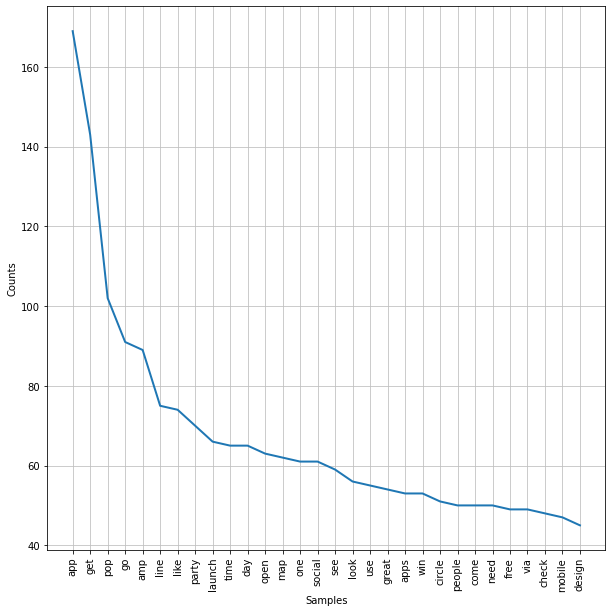

In [29]:
word_list = []
for doc in X_t:
    words = word_tokenize(doc)
    for word in words:
        word_list.append(word)
fdist = FreqDist(word_list)
plt.figure(figsize=(10,10))
fdist.plot(30);

In [43]:
my_string = ''
for doc in X_t:
    my_string += str(' ') + doc   

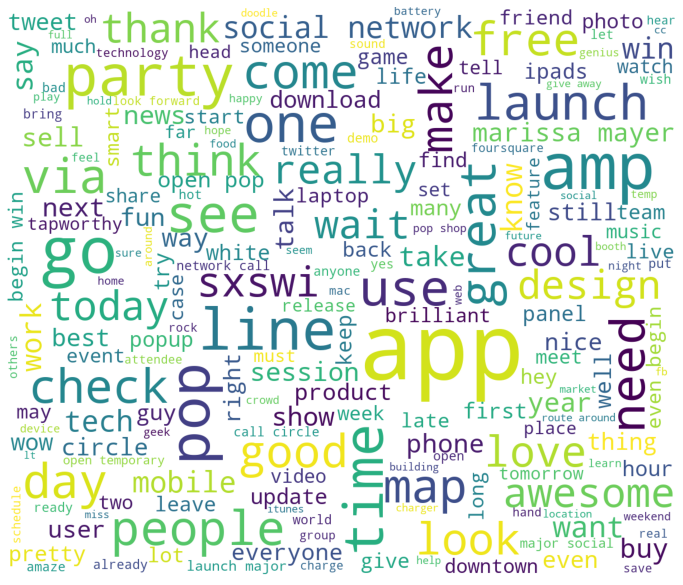

In [47]:
from PIL import Image
char_mask = np.array(Image.open('twitter.png'))
words_cloud = WordCloud(background_color='white', mask=char_mask).generate(my_string)
fig = plt.figure(1, figsize=(12, 12))
plt.axis('off')

plt.imshow(words_cloud)
plt.show();